<a href="https://colab.research.google.com/github/Shaif95/AICamp_DS/blob/main/Trading_Markers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

def get_stock_data(stock):
    # URL of the raw CSV file on GitHub
    csv_url = 'https://raw.githubusercontent.com/yumoxu/stocknet-dataset/master/price/raw/' + stock + '.csv'

    # Read the CSV data into a pandas DataFrame
    df = pd.read_csv(csv_url)

    # Return the DataFrame
    return df

# Example usage
stock = 'AAPL'
tll = stock
AAPL_df = get_stock_data(stock)
print(data.head(3))


         Date       Open       High        Low      Close  Adj Close  \
0  2012-09-04  95.108574  96.448570  94.928574  96.424286  87.121140   
1  2012-09-05  96.510002  96.621429  95.657143  95.747147  86.509338   
2  2012-09-06  96.167145  96.898575  95.828575  96.610001  87.288956   

     Volume     Value Marker  
0  91973000  0.000000     no  
1  84093800  0.070225     no  
2  97799100  0.090118     no  


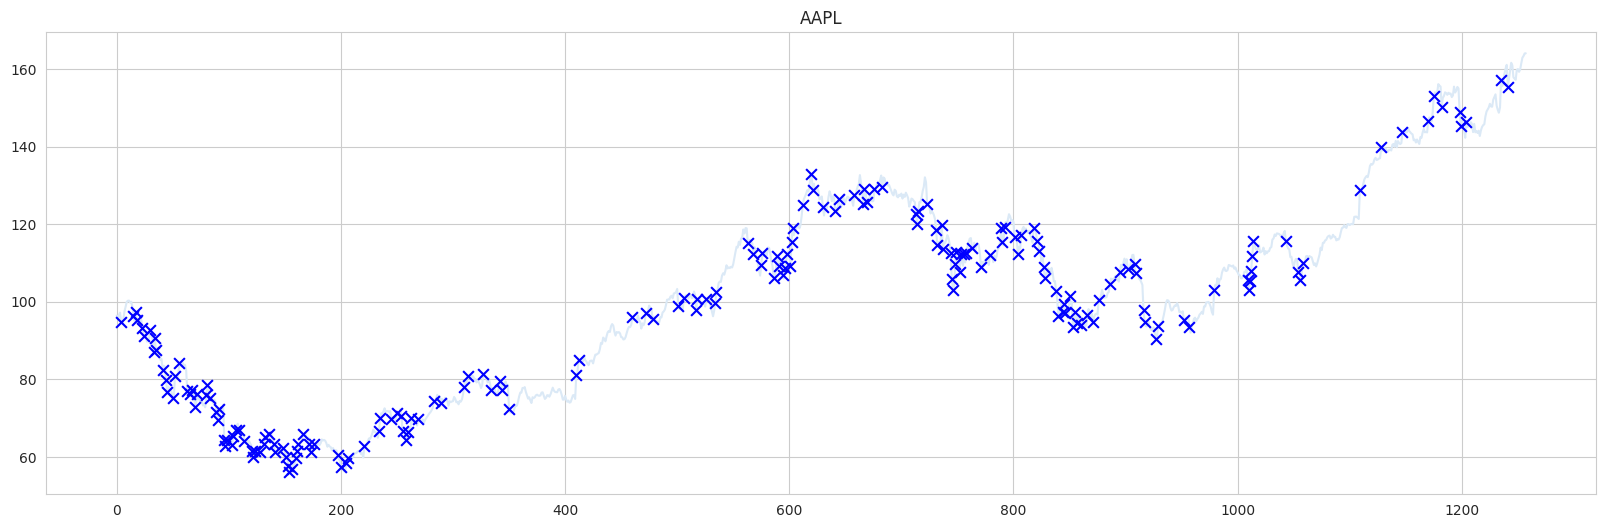

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_markers1(data, t):

    val = data['Close']
    th = []
    marker = []

    for i in range(len(data)):
        if(i == 0):
            th.append(0)
        else:
            x = val[i] - val[i-1]
            x =  (x / val[i-1] )*10
            th.append(abs(x))

    data['Value'] = th
    data['Marker'] = np.where(data['Value'] > t, 'yes', 'no')

    df = data[data['Marker'] == 'yes']
    df = df.Close

    x = pd.DataFrame({tll: AAPL_df["Close"]})
    plt.figure(figsize=(20, 6))
    plt.plot(x)
    plt.scatter(df.index, df, marker = 'x', c = 'b' , s = 60, zorder=2)
    plt.title(tll)
    plt.show()

    return data ,df

data, df = get_markers1(AAPL_df, .2)
#data.head(2)

In [ ]:
data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Value,Marker
0,2012-09-04,95.108574,96.448570,94.928574,96.424286,87.121140,91973000,0.000000,no
1,2012-09-05,96.510002,96.621429,95.657143,95.747147,86.509338,84093800,0.070225,no
2,2012-09-06,96.167145,96.898575,95.828575,96.610001,87.288956,97799100,0.090118,no
3,2012-09-07,96.864288,97.497147,96.538574,97.205711,87.827171,82416600,0.061661,no
4,2012-09-10,97.207146,97.612854,94.585716,94.677139,85.542564,121999500,0.260126,yes
5,2012-09-11,95.015717,95.728569,93.785713,94.370003,85.265068,125995800,0.032440,no
6,2012-09-12,95.264282,95.699997,93.714287,95.684288,86.452538,178058300,0.139269,no
7,2012-09-13,96.767143,97.928574,96.395714,97.568573,88.155037,149590000,0.196927,no
8,2012-09-14,98.565712,99.568573,98.269997,98.754288,89.226341,150118500,0.121526,no
9,2012-09-17,99.907143,99.971428,99.230003,99.968575,90.323479,99507800,0.122960,no


In [ ]:
Y = pd.Categorical(data['Marker']).map({'yes': 1, 'no': 0})
X = data.drop(['Date', 'Marker'], axis=1)  # Drop 'Date' and 'Marker' columns from X
